In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
## Vamos a la base y se crea (en principio sin oversampling)
df = pd.read_csv('base.csv')
df.drop(['Unnamed: 0','spotifyID'], axis=1, inplace = True)
y = df['hit']
X = df.drop(['hit'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
len(X_train), len(X_test), len(y_train), len(y_test)
X_test.shape

(7131, 13)

In [3]:
y_test.dtypes

dtype('int64')

In [4]:
X.shape

(21609, 13)

## Gaussian Naive Bayes sin SMOTE

Generamos clases a partir de una distribución Gaussiana. 

In [5]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [6]:
model.predict(X_test.values)

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
# Predecimos los resultados sobre el Train
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

In [10]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

In [13]:
print('Matriz confusión con datos de Train')
print(cm_train)
print('Matriz confusión con datos de Train')
print(cm_test)

Matriz confusión con datos de Train
[[14271     0]
 [  207     0]]
Matriz confusión con datos de Train
[[7026    0]
 [ 105    0]]


## Gaussian Naive Bayes con SMOTE

Generamos clases a partir de una distribución Gaussiana.

In [14]:
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

model.fit(X_train_res,y_train_res)

GaussianNB(priors=None)

In [15]:
# Predecimos los resultados sobre el Train
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

In [16]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

In [17]:
print('Matriz confusión con datos de Train')
print(cm_train)
print('Matriz confusión con datos de Train')
print(cm_test)

Matriz confusión con datos de Train
[[7527 6744]
 [  58  149]]
Matriz confusión con datos de Train
[[3729 3297]
 [  36   69]]


### Curvas `ROC` y área bajo la curva (`AUC`)

In [19]:
y_probs_nb = model.predict_proba(X_test)
fpr_nb,tpr_nb,thr_nb = roc_curve(y_test, y_probs_nb[:,1])

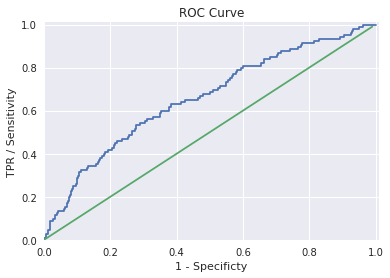

In [21]:
df = pd.DataFrame(dict(fpr=fpr_nb, tpr=tpr_nb, thr = thr_nb))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [22]:
print('AUC=', auc(fpr_nb, tpr_nb))

AUC= 0.6567836471337754


Sobre la base del area bajo la curva ROC se puede decir que el modelo es **regular** dado que se encuentra entre [0.6, 0.75).